# 2変数間の記述統計

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from scipy import stats
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
from IPython.display import Image

# 画像ファイル名(パス)
img = plt.imread("images/cov_x.png")
img2 = plt.imread("images/cov_y.png")
img3 = plt.imread("images/cov1.png")
img4 = plt.imread("images/cov2.png")

file_name = "images/cov_mat.png"
file_name2 = "images/cov3.png"
file_name3 = "images/cov4.png"
file_name4 = "images/cov5.png"
file_name5 = "images/cov6.png"
file_name6 = "images/cov7.png"
file_name7 = "images/asso.png"

## <u>共分散</u>　(covariance)

<center>
  <br>
        <h3><font color="red"><b>連続変数間の相関関係の強さ</b></font></h3>
    <h5><font color="red"><b>(相関係数を導き出すのに必要なモノ)</b></font></h5>
  <br>
  <br>
</center>

$$
\begin{aligned}
S^2_x　&　=　\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2 \\
\\
&　=　\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(x_i - \bar{x}) \\
\end{aligned}
$$

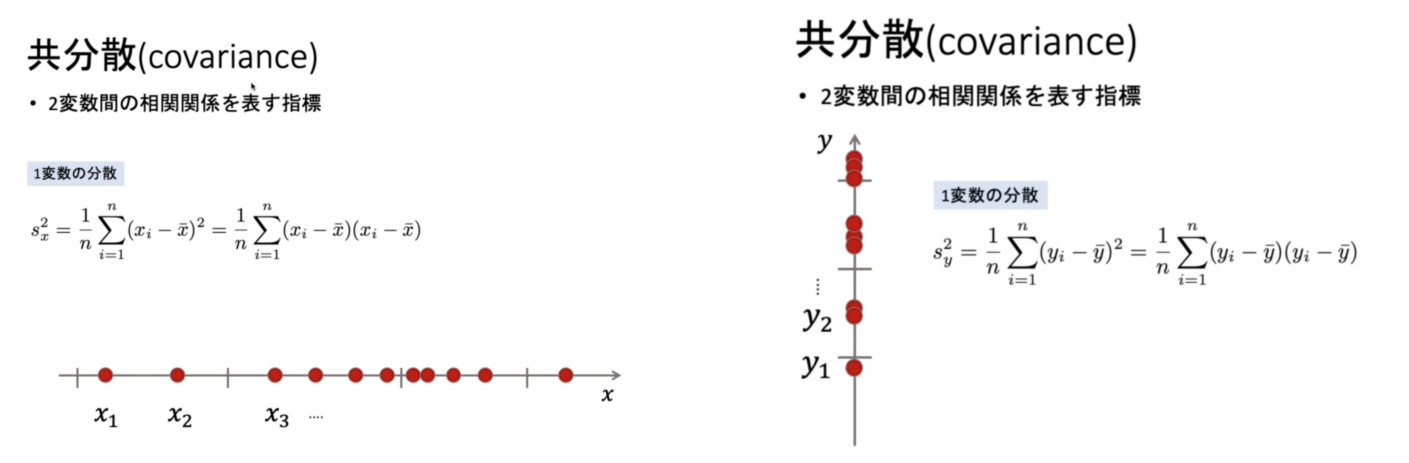

In [42]:
# matplotlib 画像の読み込みと表示
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img)
plt.axis('off')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img2)
plt.axis('off')
plt.show()

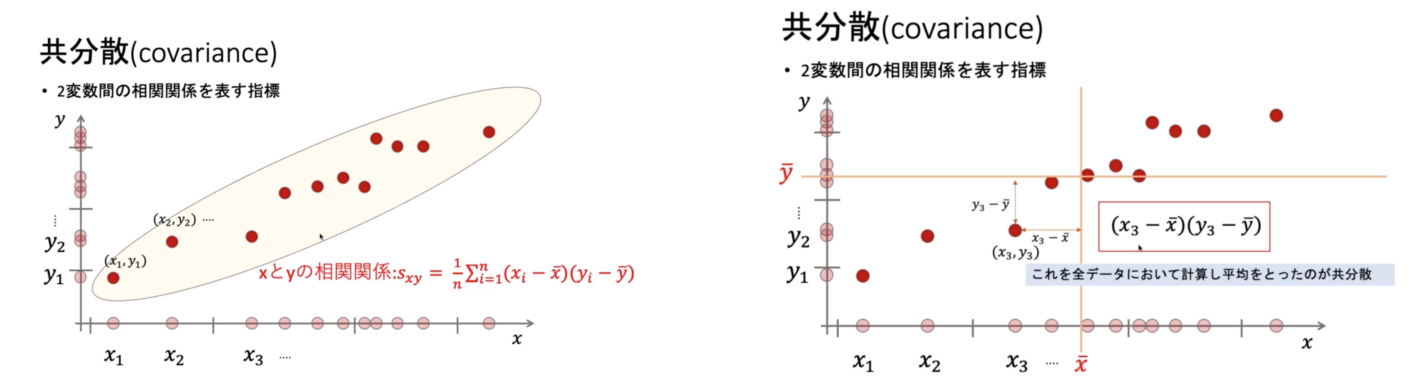

In [43]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img3)
plt.axis('off')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img4)
plt.axis('off')
plt.show()

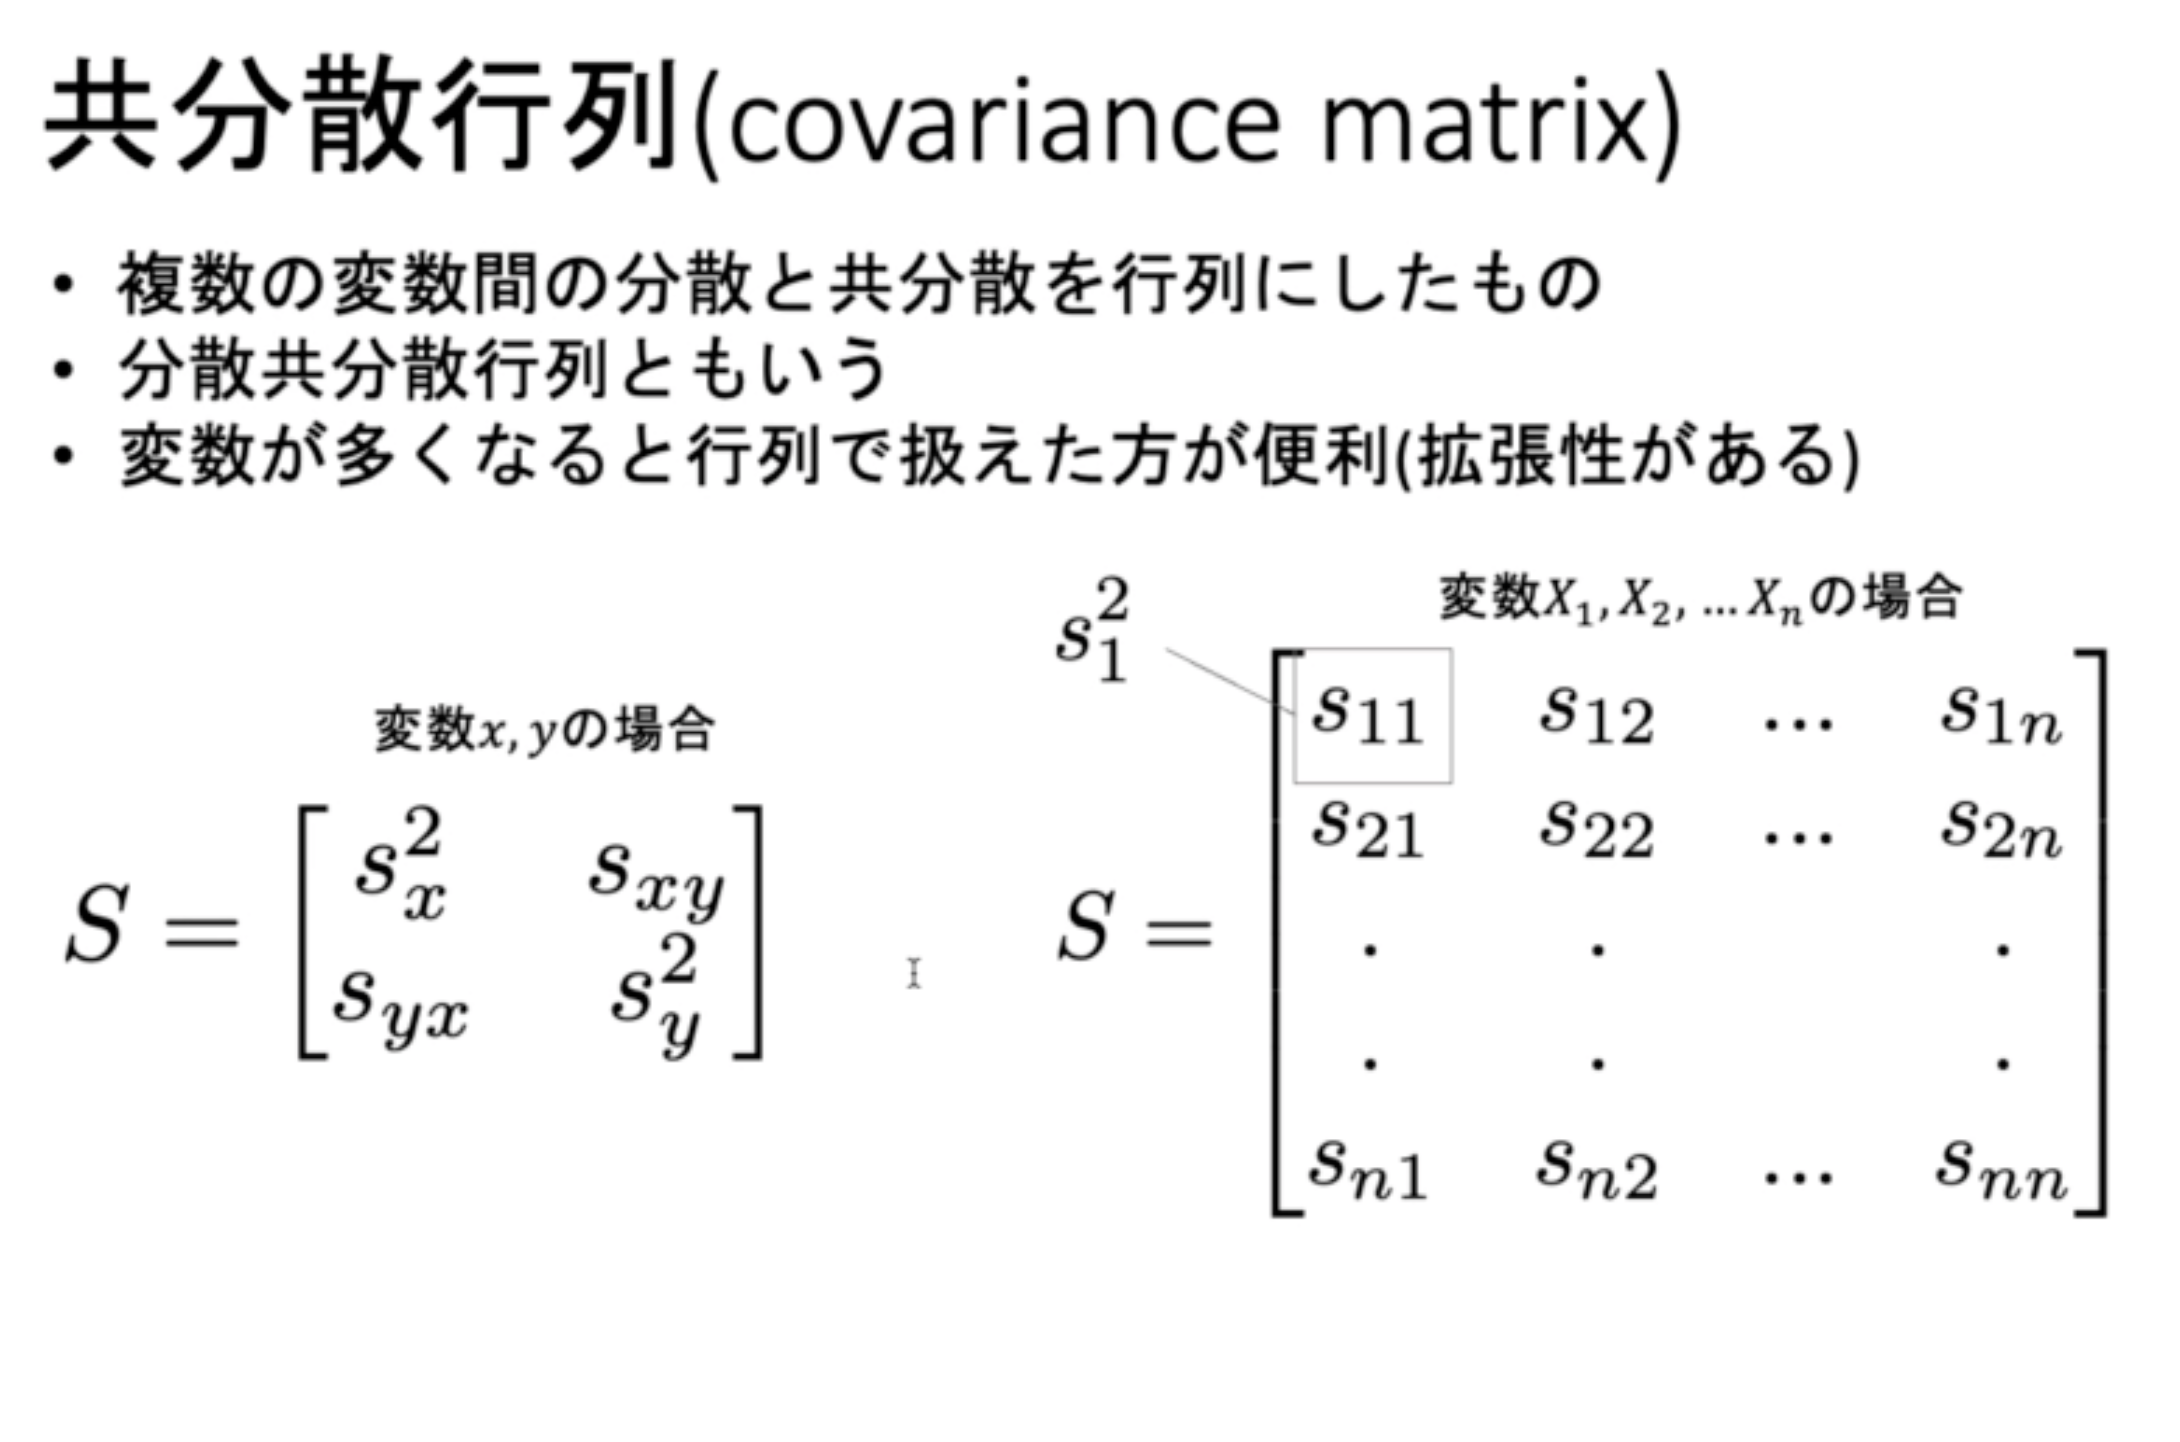

In [46]:
# IPythonで画像の読み込みと表示
Image(file_name, embed=True, width=700, height=600)

### 共分散　(covariance)
- 共分散行列を求める

In [49]:
# n -1 不偏分散
np.cov([1, 2, 3], [-4, 5, 16])

array([[  1.        ,  10.        ],
       [ 10.        , 100.33333333]])

In [51]:
# bias=True : 普通の共分散にできる
np.cov([1, 2, 3], [-4, 5, 16], bias=True)

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [53]:
df.head()

total_bill   tip     sex smoker  day    time  size  tip_rate
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808

In [54]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [58]:
# ３つの Series を stack でガッちゃんこして行列にする : 共分散行列
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [60]:
# 不偏分散　：　実務はこのような使い方の方が多い
df.cov()

total_bill       tip      size  tip_rate
total_bill   79.252939  8.323502  5.065983 -0.184107
tip           8.323502  1.914455  0.643906  0.028931
size          5.065983  0.643906  0.904591 -0.008298
tip_rate     -0.184107  0.028931 -0.008298  0.003730

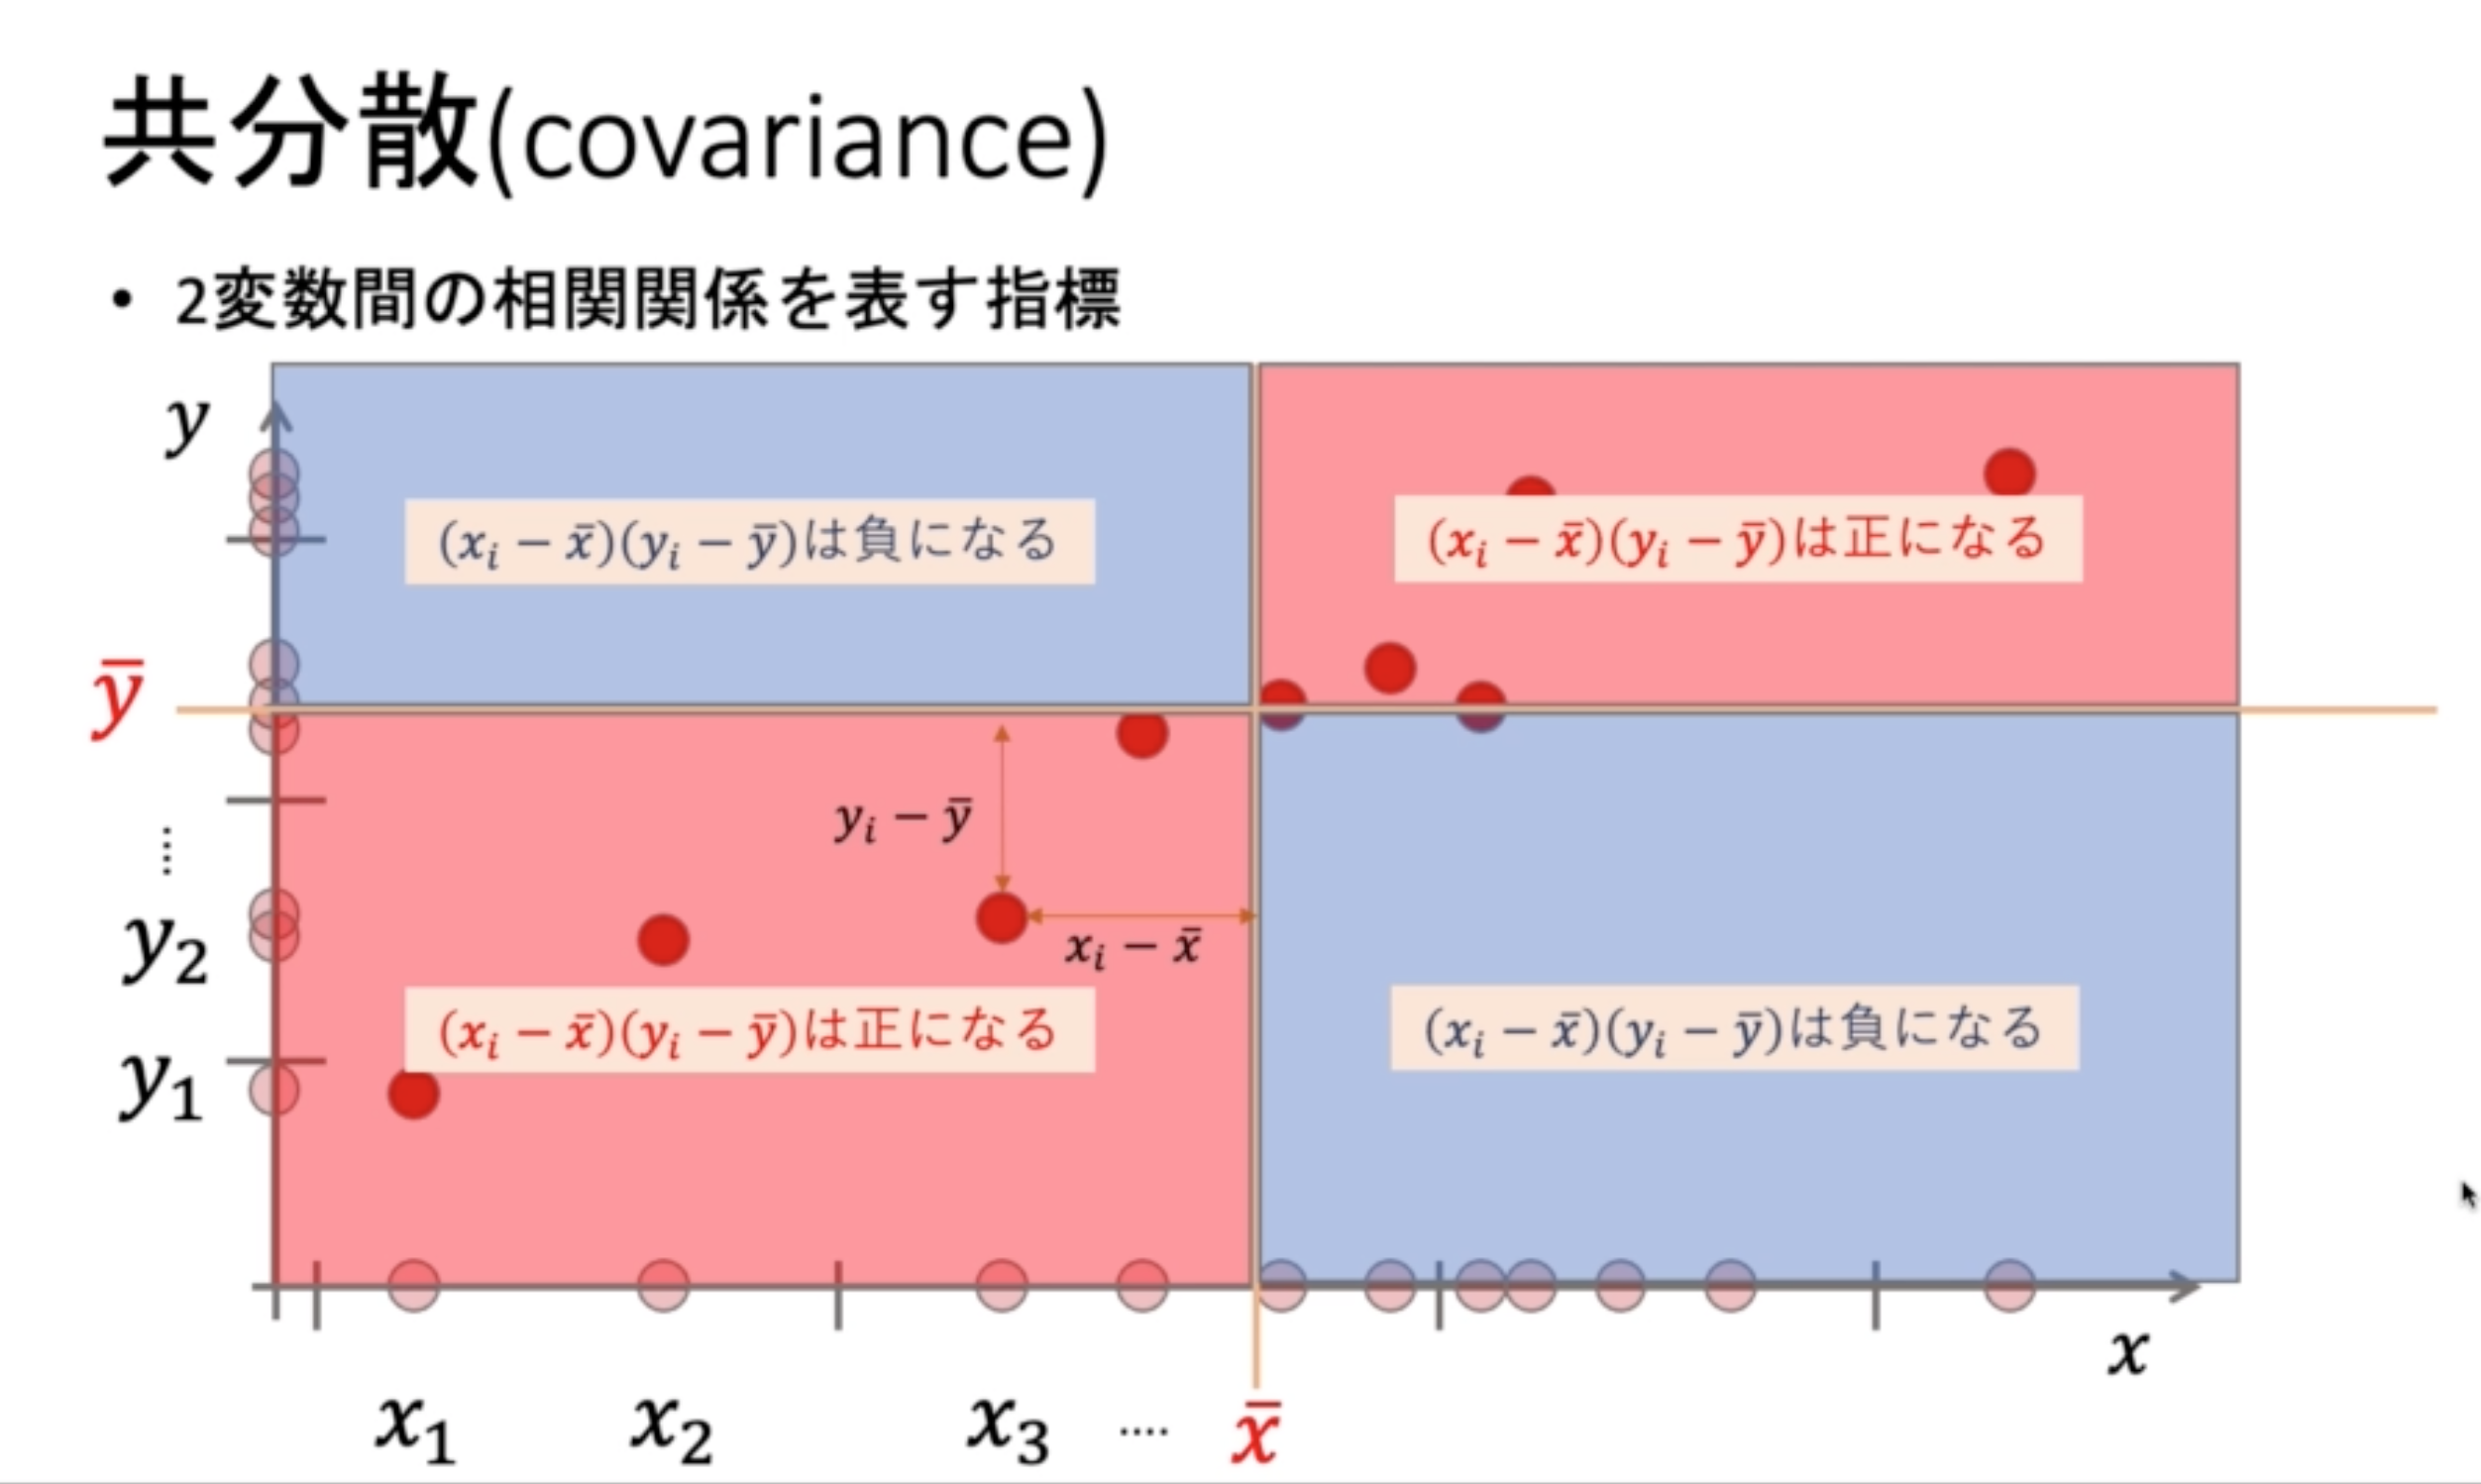

In [70]:
# IPythonで画像の読み込みと表示
Image(file_name2, embed=True, width=800, height=800)

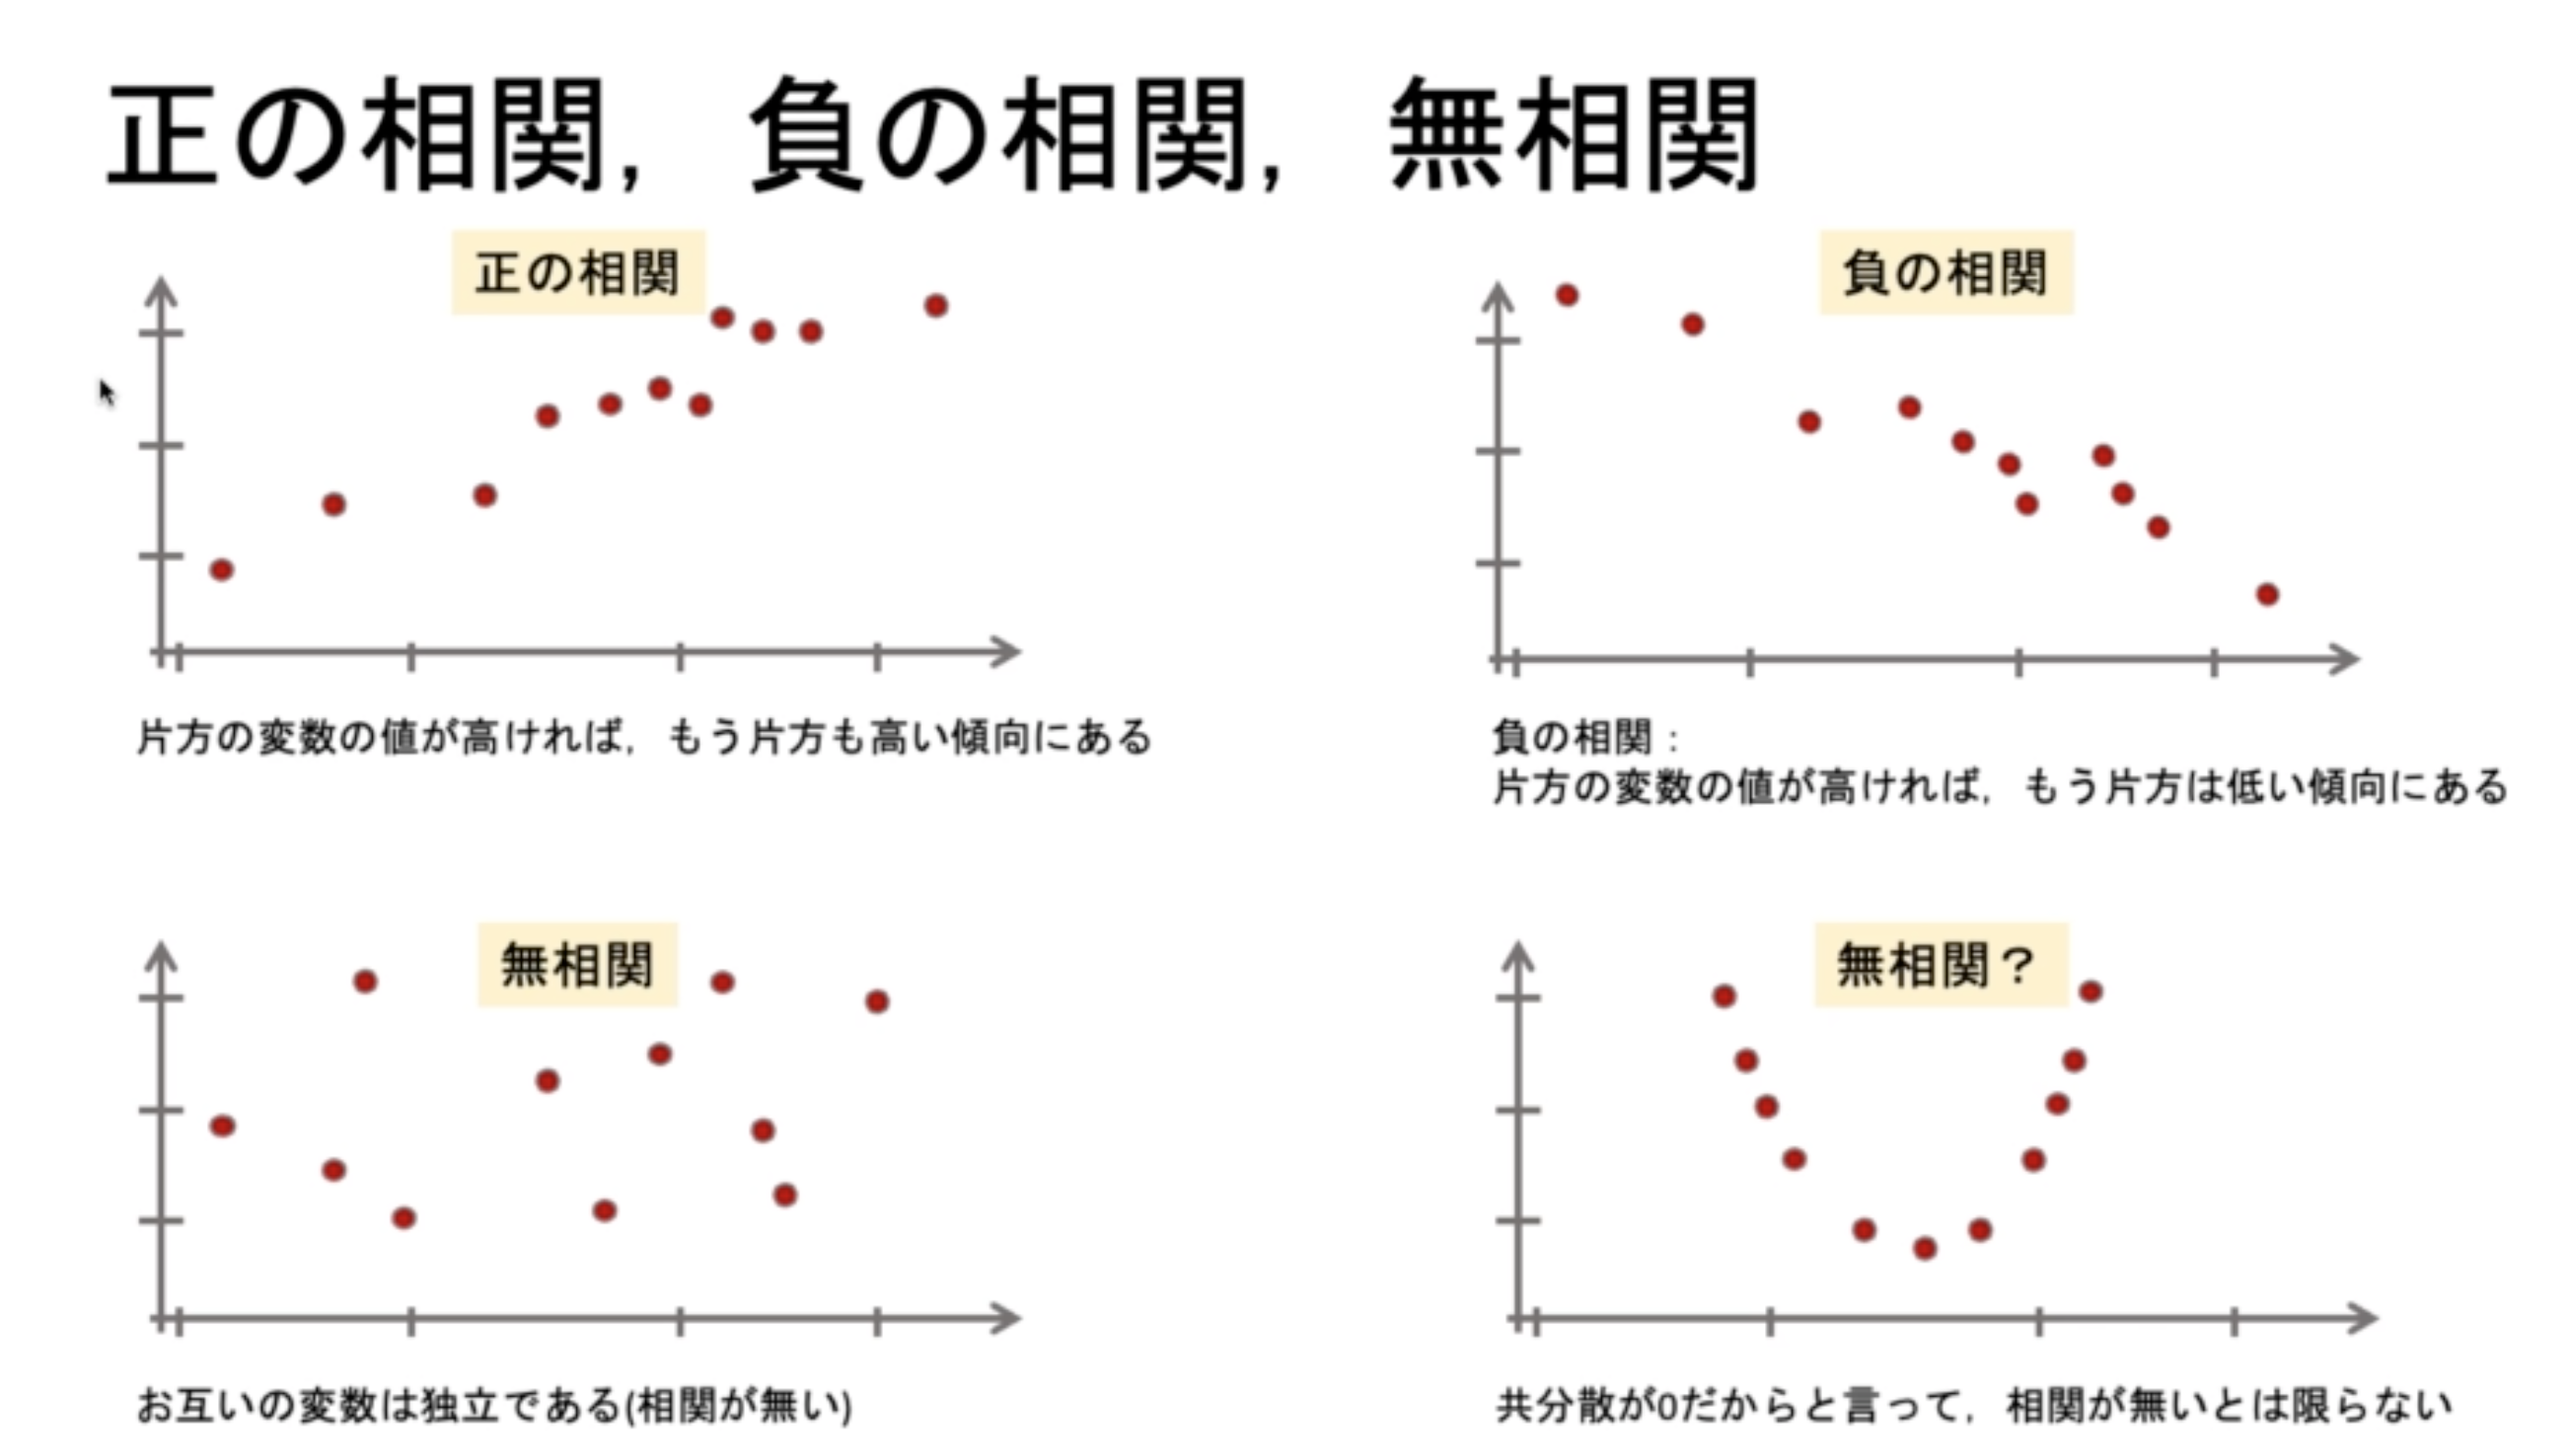

In [69]:
# IPythonで画像の読み込みと表示
Image(file_name3, embed=True, width=800, height=800)

# <u>相関係数</u>　(correlation coefficient)

<center>
  <br>
        <h3><font color="red"><b>連続変数間の相関関係の強さを標準化したもの</b></font></h3>
  <br>
  <br>
</center>

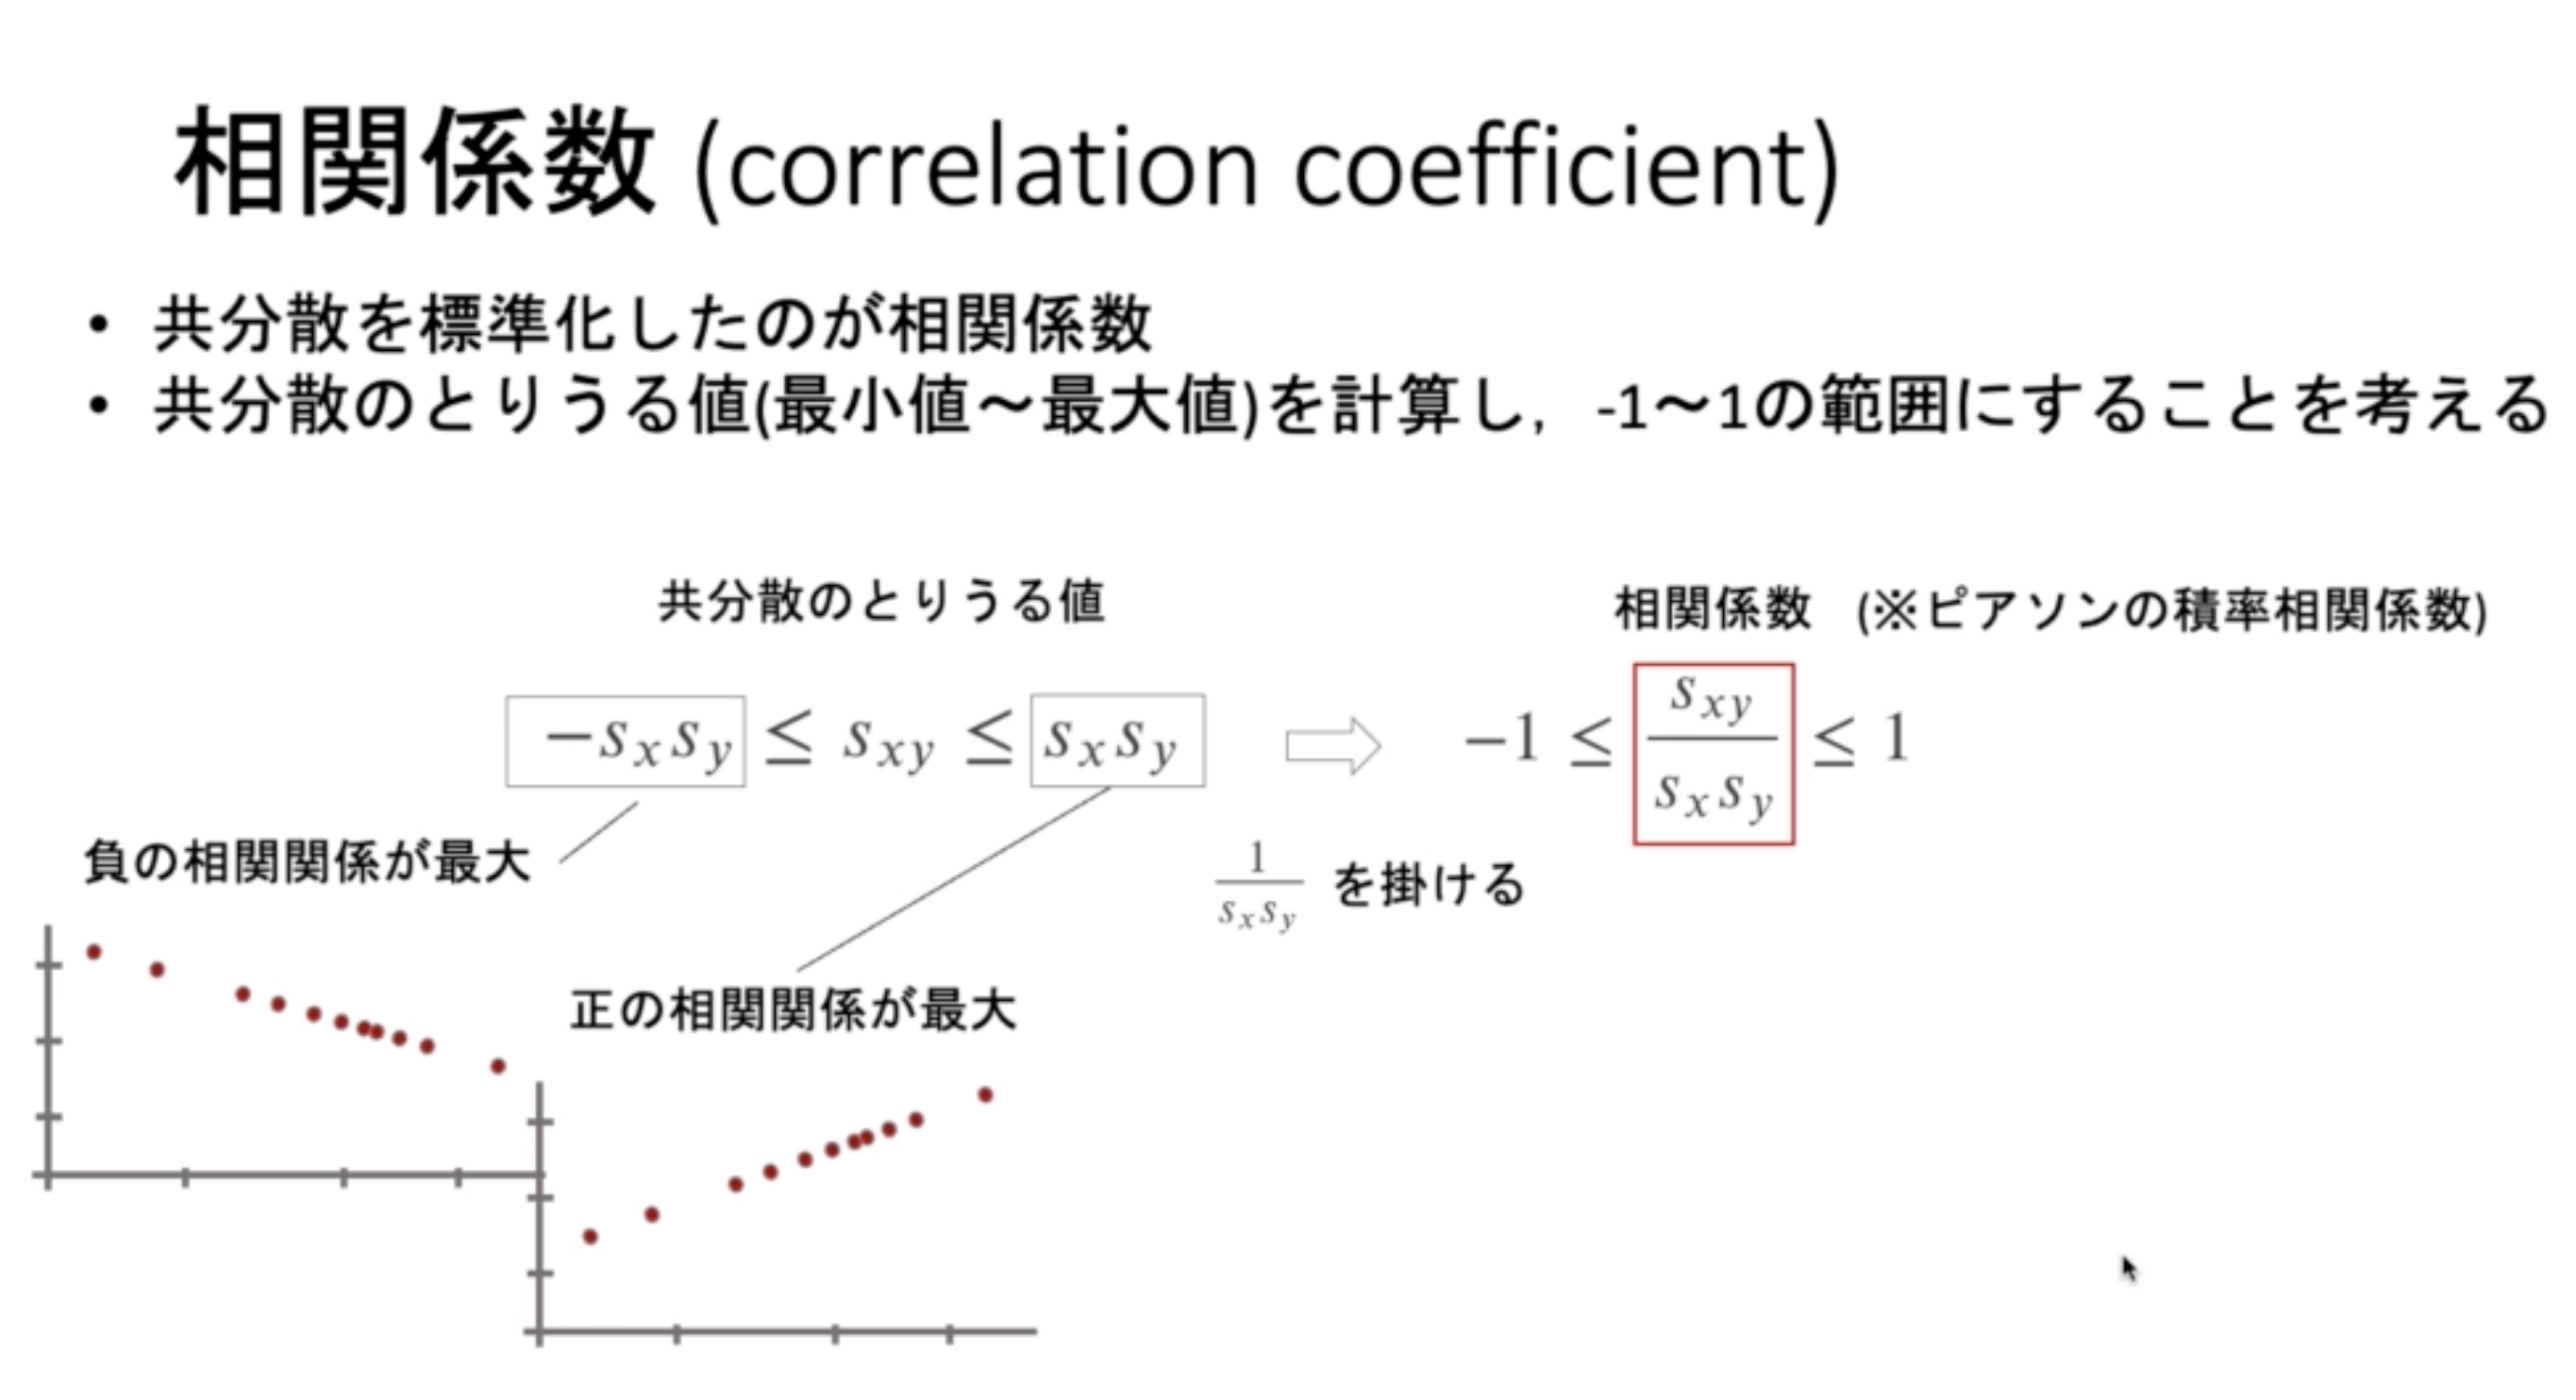

In [72]:
# IPythonで画像の読み込みと表示
Image(file_name4, embed=True, width=800, height=800)

<center>
  <br>
        <h4>Sx (xの標準偏差　: σ)　×　Sy (yの標準偏差　： σ)　を掛けて　ー　（マイナス）したモノ</h4>
  <br>
        <h4>負の値が最大の時の共分散</h4>
    ↓
   <br>
</center>

$$
-S_xS_y
$$

<center>
  <br>
        <h4><font color="blue">右下がりで一直線に並んだ時に <b><u>負の相関が最小になる</u></b></font></h4>
  <br>
</center>


<center>
  <br>
        <h4>Sx (xの標準偏差　: σ)　×　Sy (yの標準偏差　： σ)　を掛けたモノ</h4>
  <br>
        <h4>正の値が最大の時の共分散</h4>
    ↓
 <br>
</center>

$$
\\
S_xS_y
$$

<center>
            <h4><font color="red">右肩上がりで一直線の時に並んだ時に <b><u>正の相関が最大になる</u></b></font></h4>
  <br>
  <br>
</center>


<center>
<h4>共分散がとりうる値</h4>
↓
<br>
</center>

$$
-S_xS_y　\leq　S_{xy}　\leq　S_xS_y \\
\\
$$

<center>
<h4>両辺に掛ける</h4>
↓
<br>
</center>

$$
\frac{1}{S_xS_y} \\
\\
$$

<center>
<br>
<h4>(xの標準偏差　: σ)　×　(yの標準偏差　： σ)　÷　共分散（x,yの共分散）</h4>
<br>
↓
<br>
<u><h3>相関係数　（※ ピアソンの積率相関係数）</h3></u>
↓
<br>
<br>
</center>

$$
- 1　\leq　\frac{S_{xy}}{S_xS_y}　\leq　1 \\
\\
$$

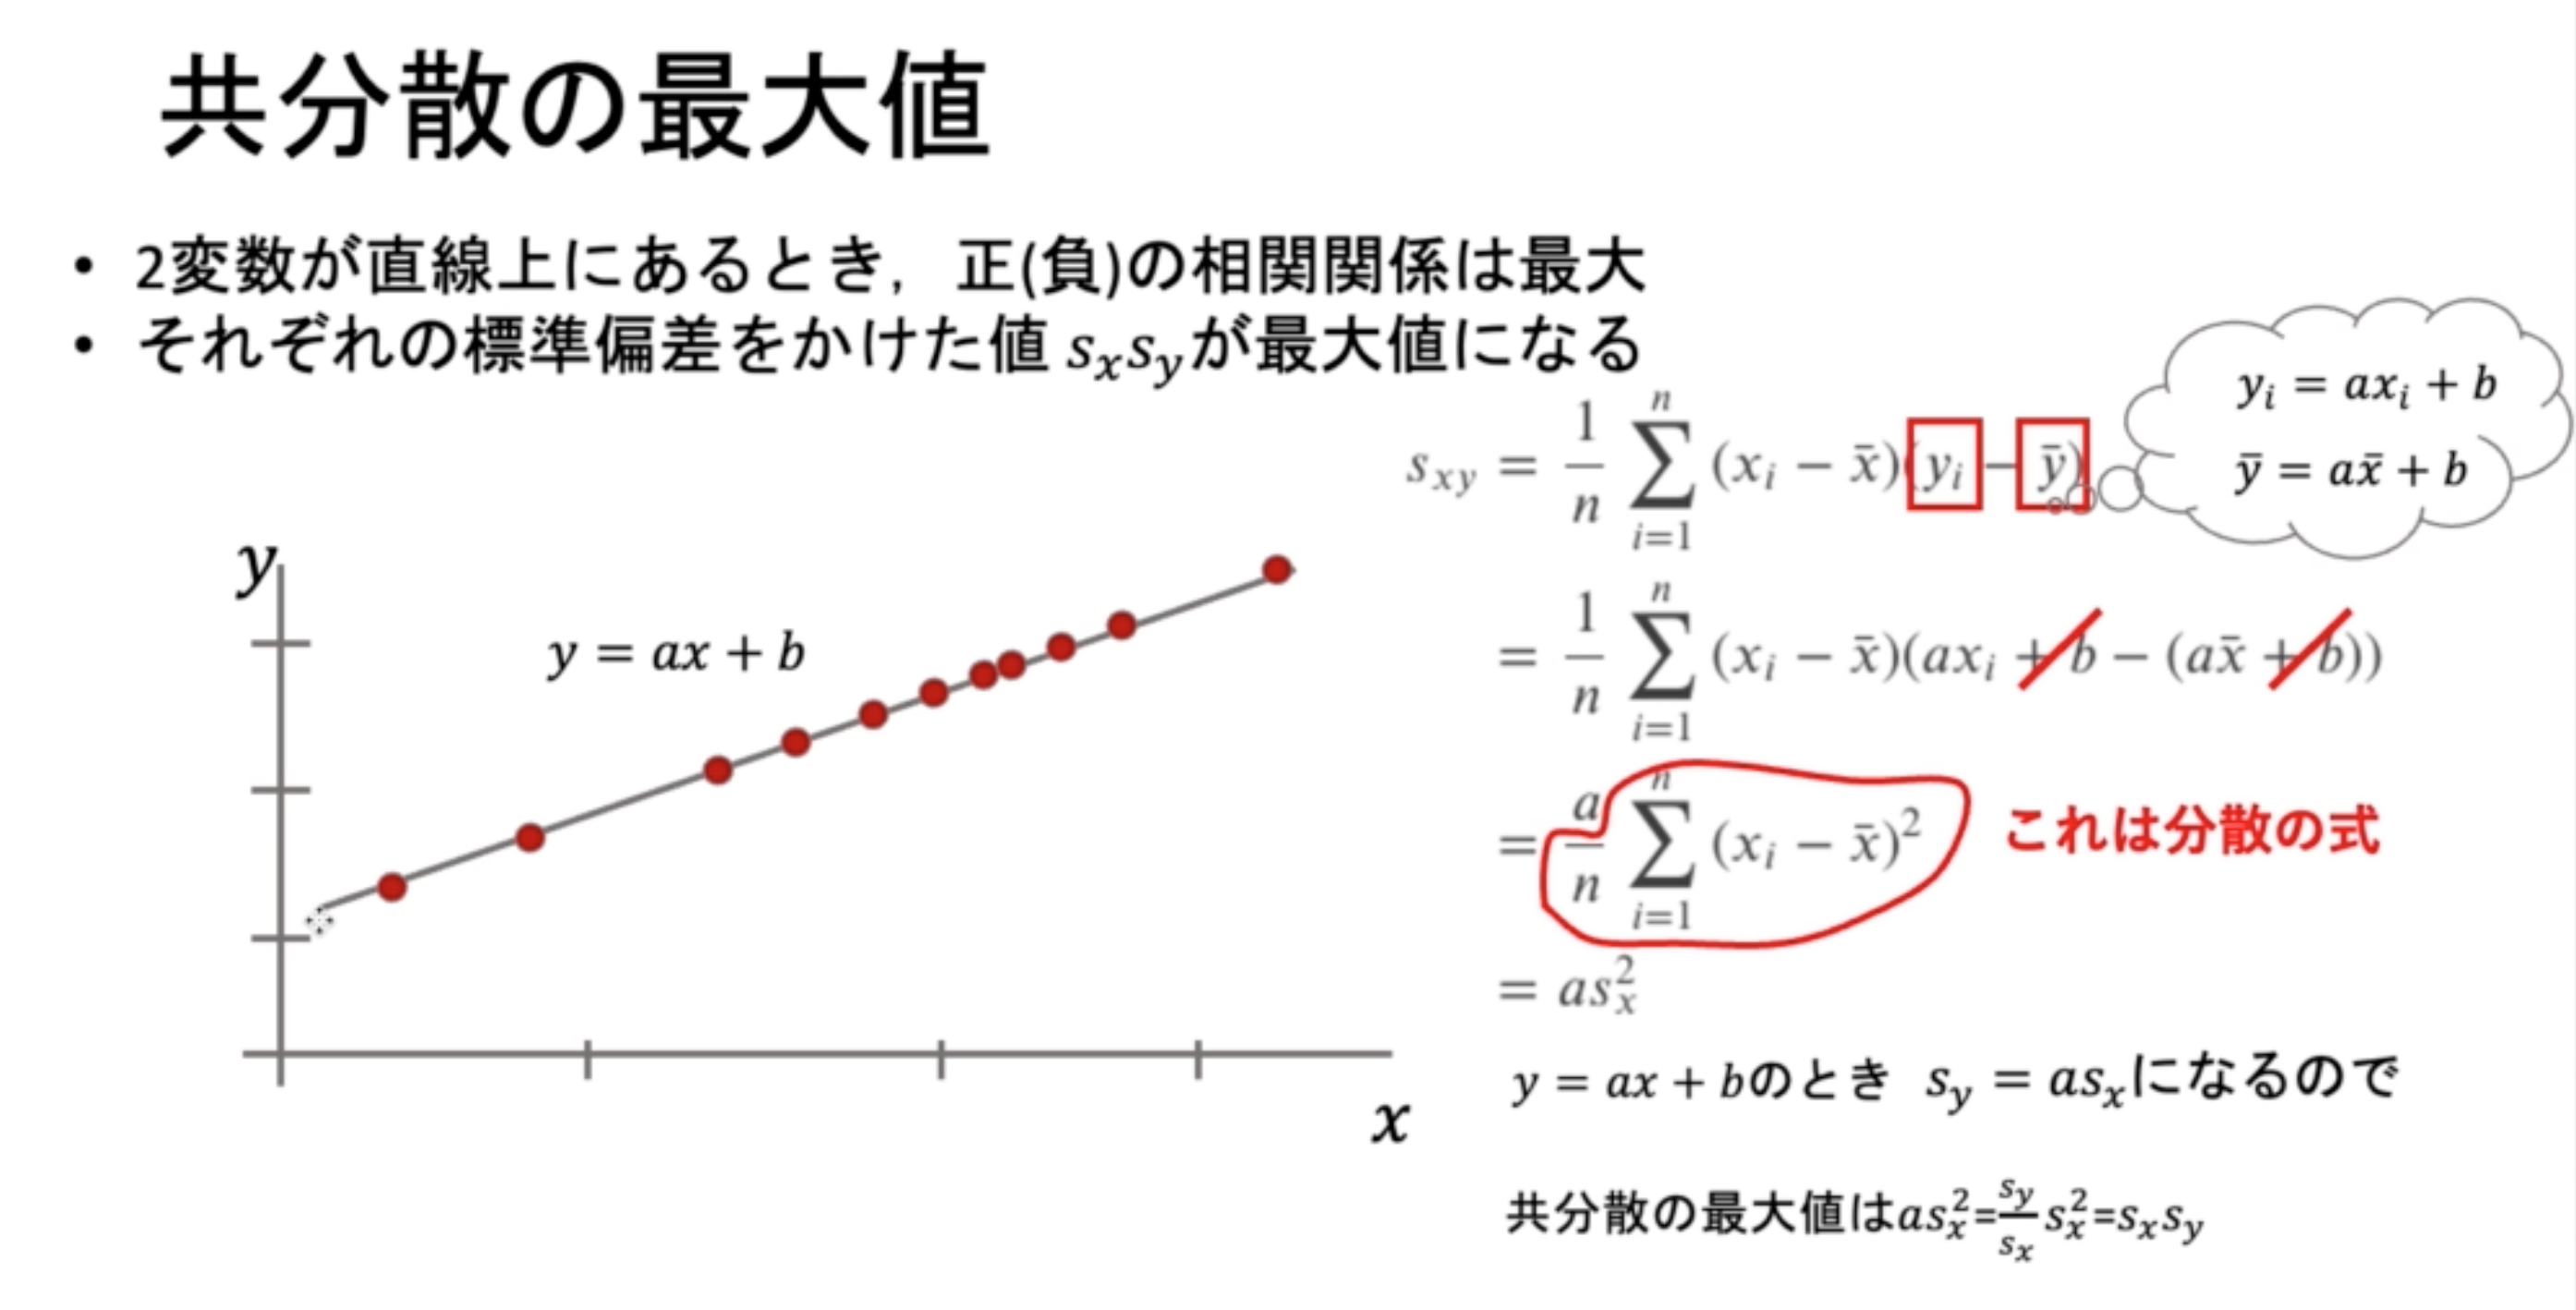

In [78]:
# IPythonで画像の読み込みと表示
Image(file_name5, embed=True, width=800, height=500)

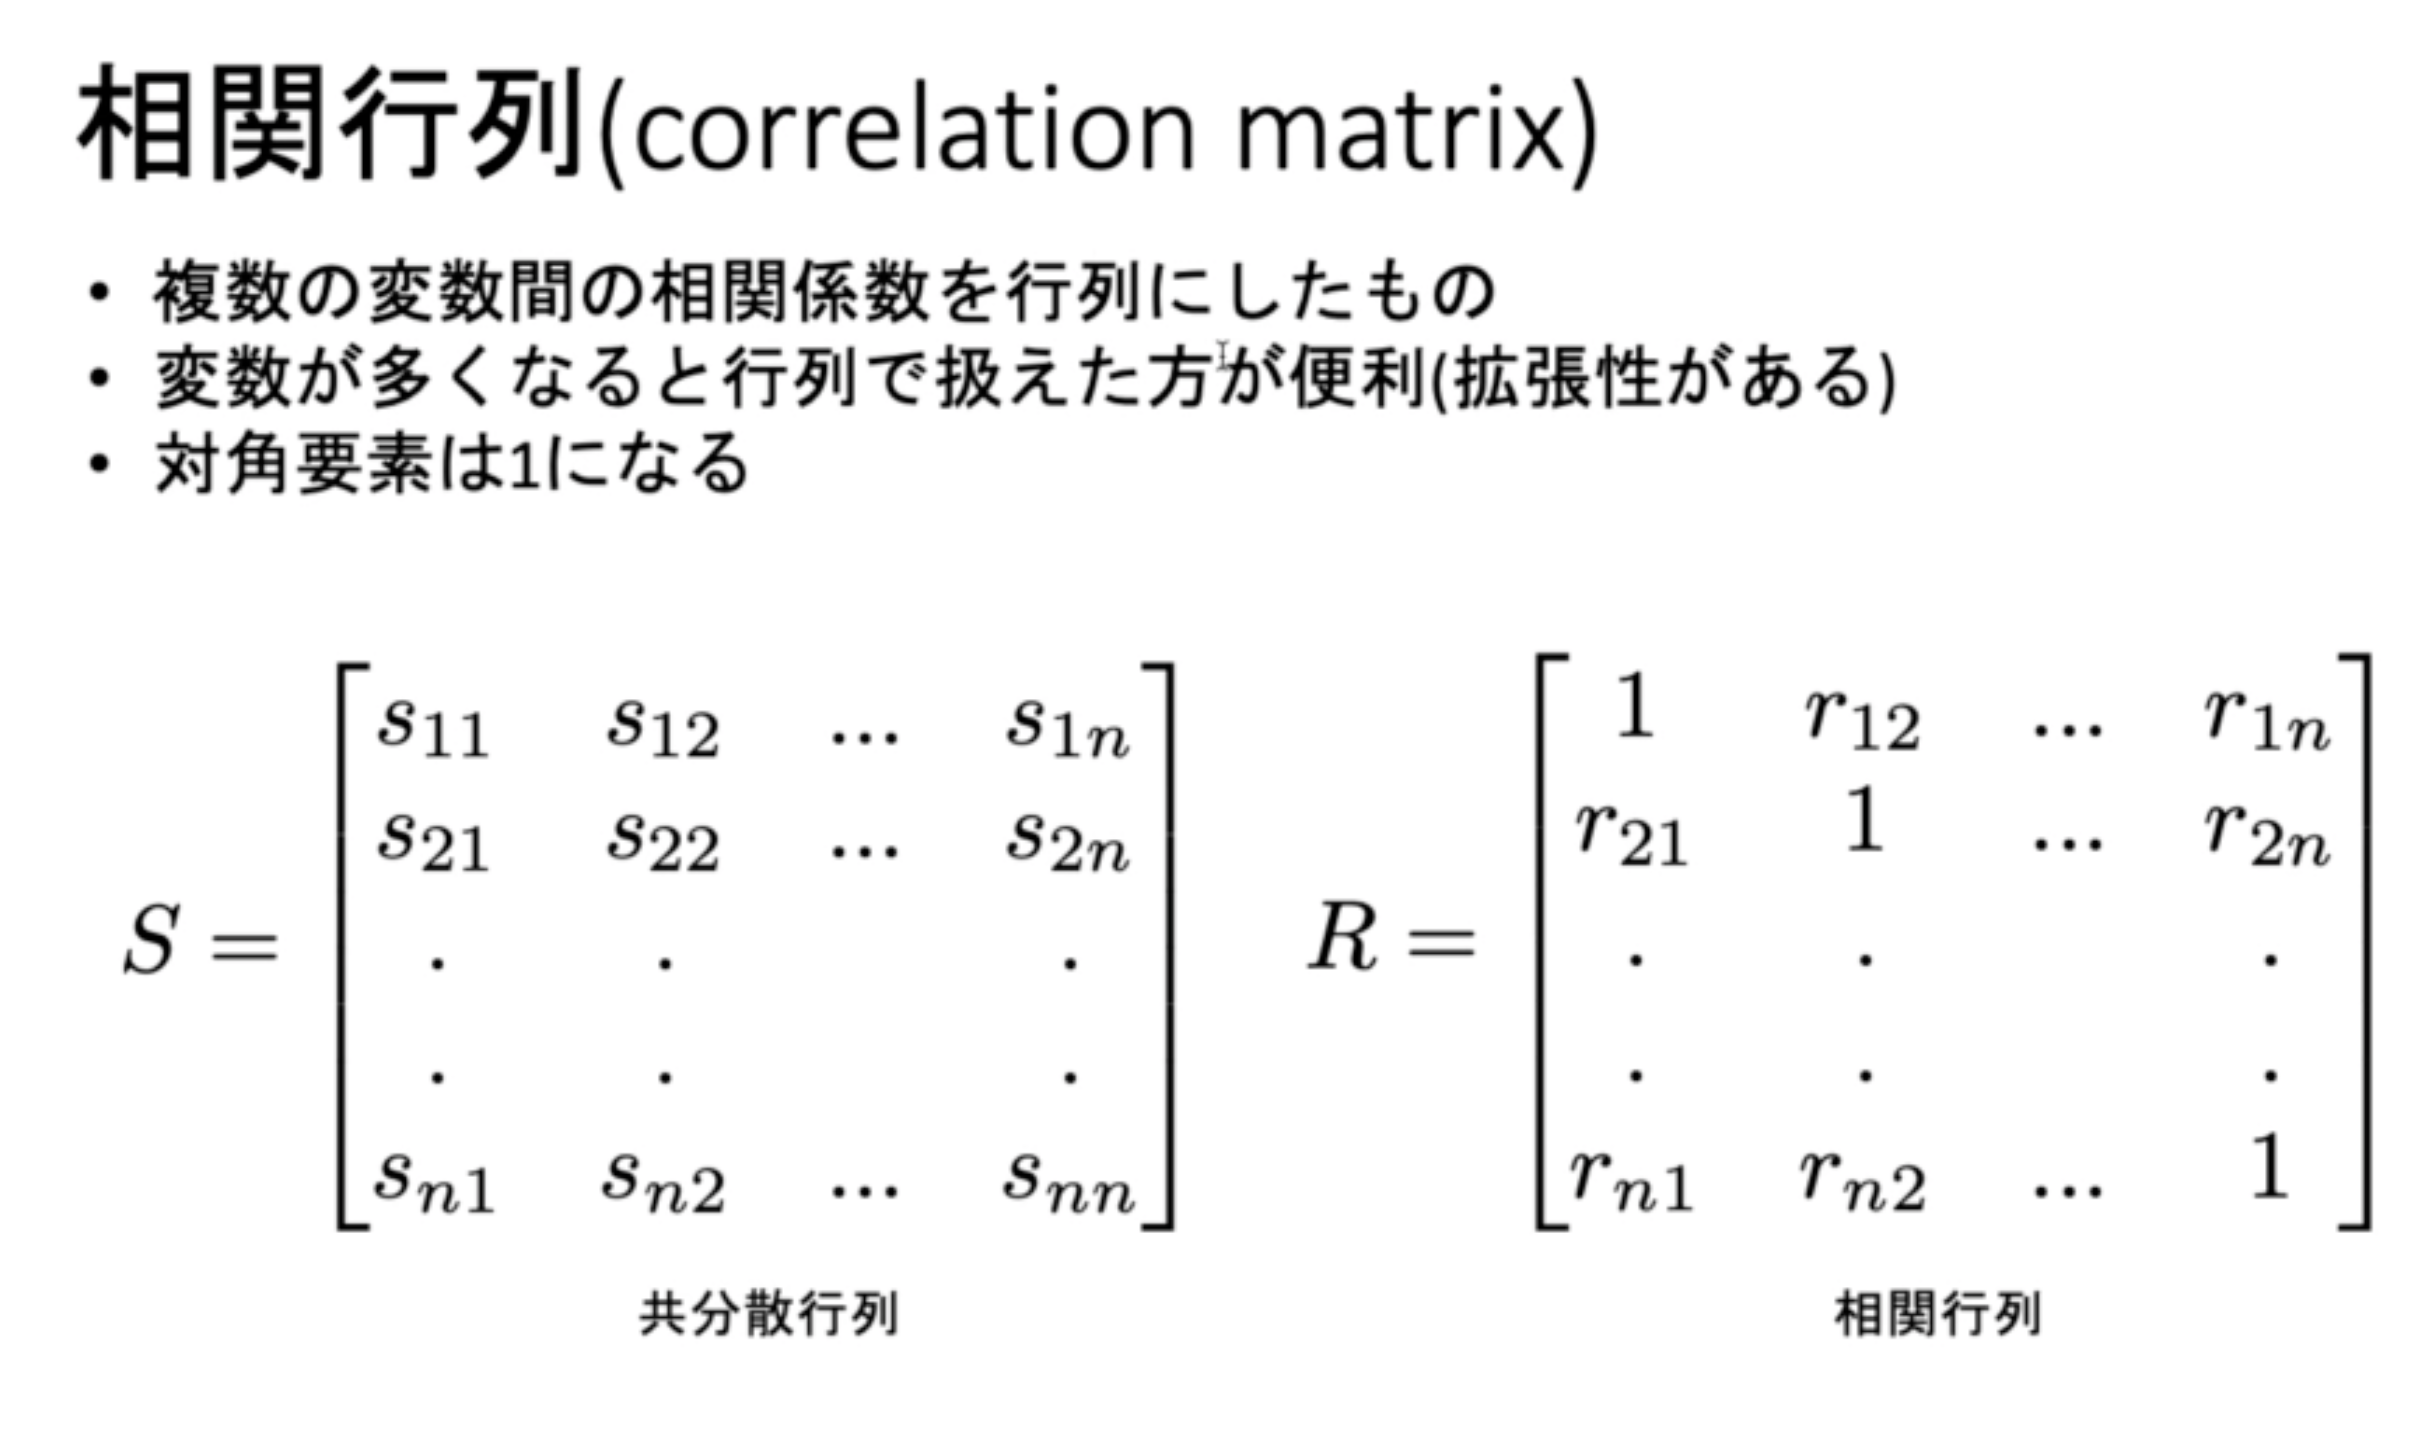

In [80]:
# IPythonで画像の読み込みと表示
Image(file_name6, embed=True, width=800, height=500)

### 相関係数　(correlation coefficient)
- 相関係数を求める
- 相関行列を描画する

In [82]:
# 相関行列
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [84]:
# ３つの Series を stack でガッちゃんこして行列にする : 相関行列
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [85]:
# df : 相関行列
df.corr()

total_bill       tip      size  tip_rate
total_bill    1.000000  0.675734  0.598315 -0.338624
tip           0.675734  1.000000  0.489299  0.342370
size          0.598315  0.489299  1.000000 -0.142860
tip_rate     -0.338624  0.342370 -0.142860  1.000000

```python
df.corr( )
```
- df.corr(　)　は　**実際の業務でもよく使用する**

<center>
  <br>
        <h4>相関係数とは…</h4>
<br>
    ↓
<br>
    <h4>連続変数に対しての相関の指標</h4>
<br>
    ↓
<br>
    <h4>category変数(sex, time, colum) は抜け落ちるので覚えておく</h4>
<br>
</center>



- total bill と tip rate の関係を見ると -0.338 (-34%)

    - **お会計が上がれば tip の割合が少なくなる傾向がある**
        
        - 1000円のお会計であれば　　20% の tip は 200円
        - 10000円のお会計であれば　20% の tip　は 2000円　

<AxesSubplot:>

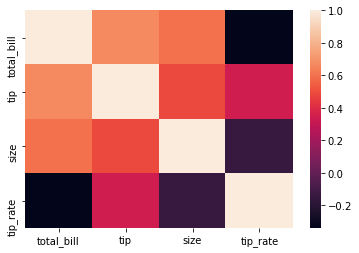

In [91]:
# heatmap で表示　：　ヒートマップも非常に便利でよく使用するの
sns.heatmap(df.corr())

<AxesSubplot:>

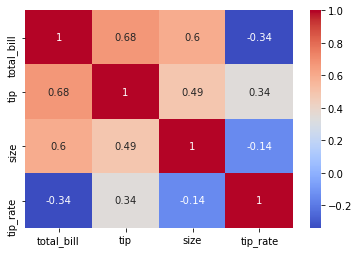

In [92]:
# coolwarm = color 変更 : annot=True -> 数値を入れてくれる
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<center>
    機械学習でモデリングするときによく使用する
  <br>
<h4><font color="blue"><b>負の相関が青になる</b></font></h4>
<h4><font color="red"><b>正の相関が赤になる</b></font></h4>
  <br>
</center>



# <u>連関係数</u>　(association)

<center>
  <br>
        <h3><font color="red"><b>category変数間の相関</b></font></h3>
  <br>
  <br>
</center>

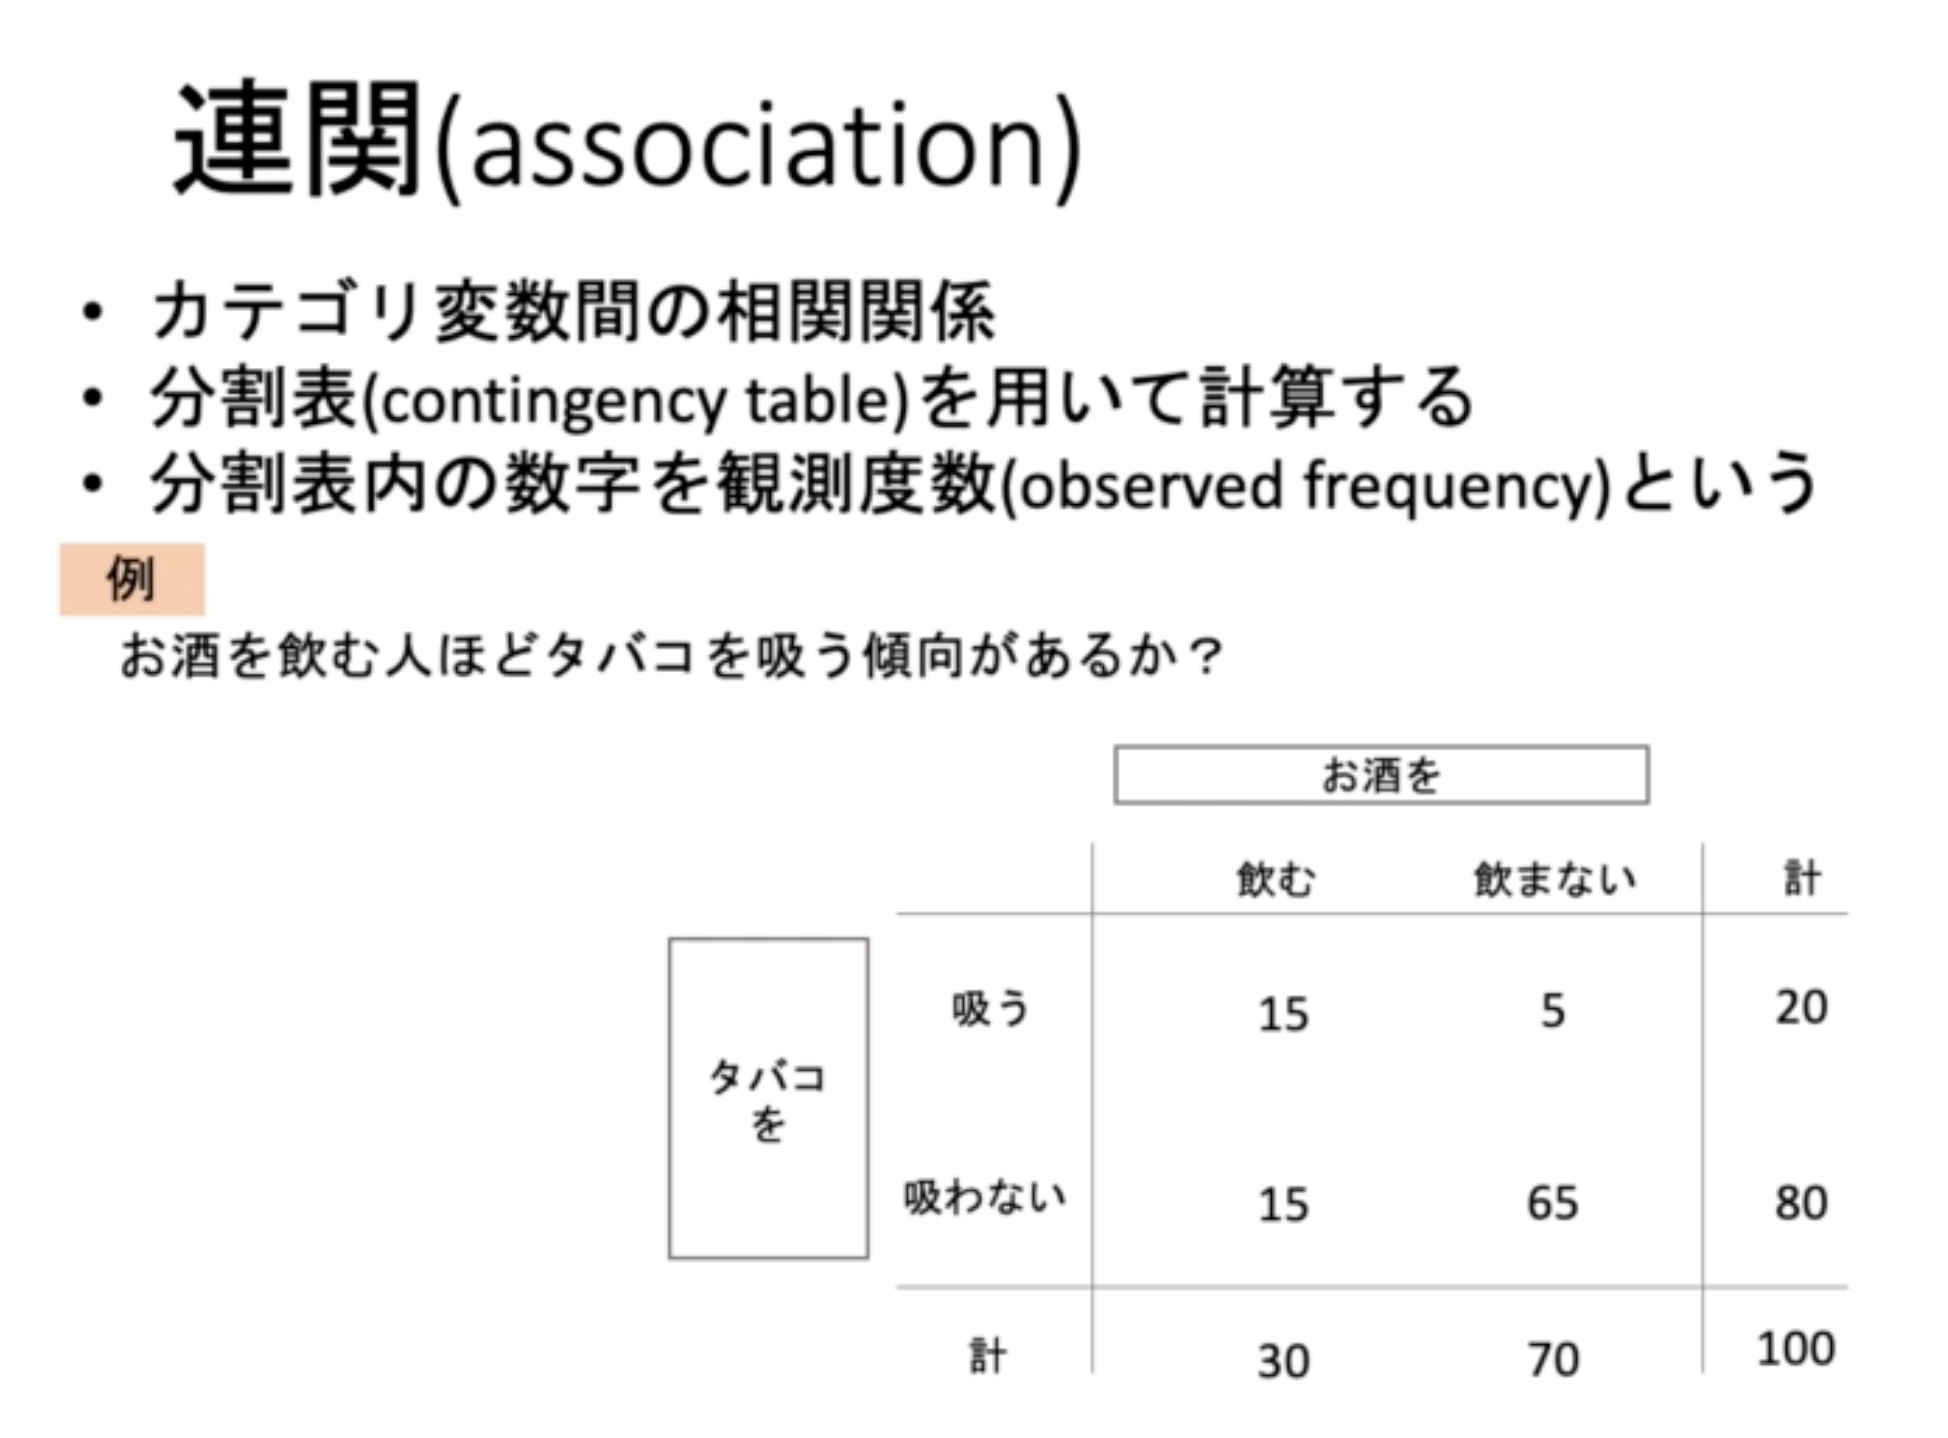

In [94]:
# IPythonで画像の読み込みと表示
Image(file_name7, embed=True, width=600, height=400)